### Predicting the optimum number of clusters and represent it visually

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
#Checking missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
## Dataset has no missing values

In [7]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

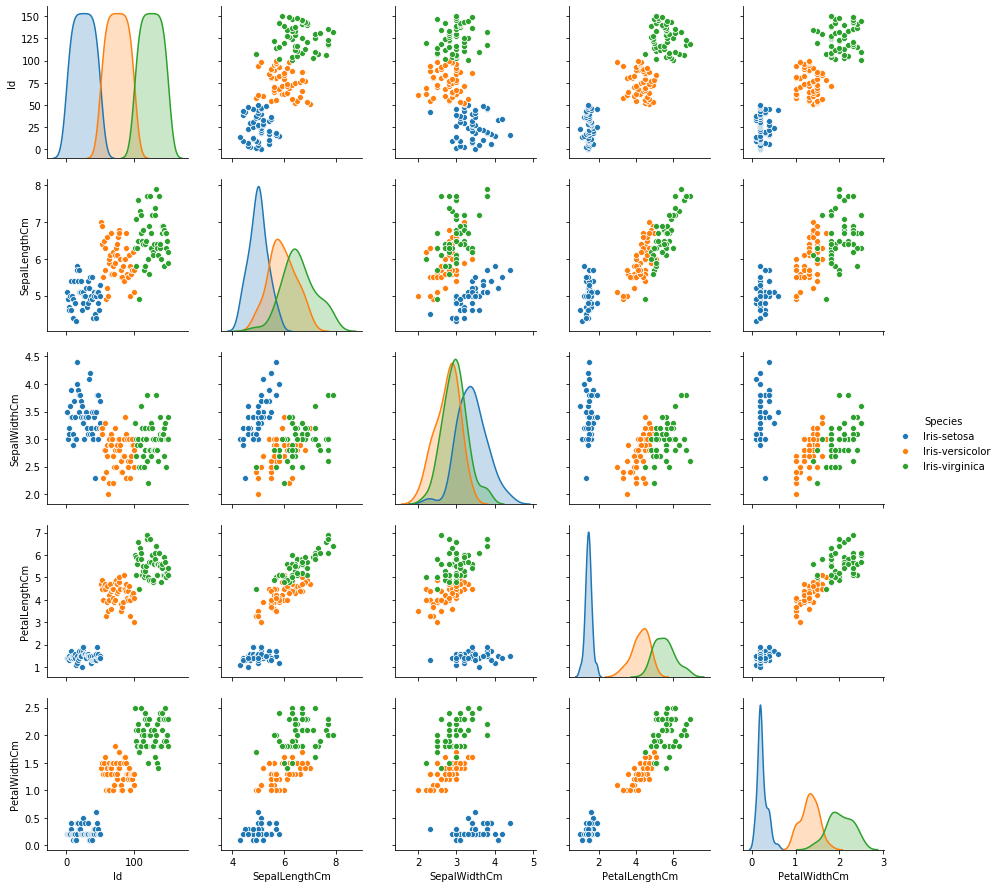

In [9]:
import seaborn as sns
sns.pairplot(df, hue='Species')

There are 3 Species provided in the dataset but as the problem here is to find the optimum number for K means we can convert the categorical feature using label encoding.

### Label Encoding

In [10]:
from sklearn import preprocessing 

In [11]:
label_encoder = preprocessing.LabelEncoder() 

In [12]:
df['Species']= label_encoder.fit_transform(df['Species']) 

In [13]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [14]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [15]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


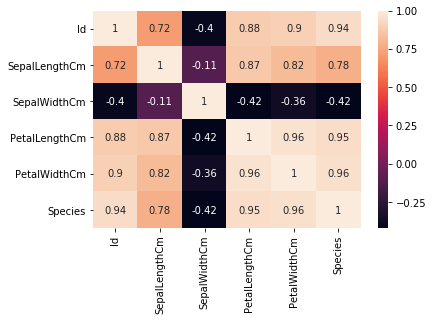

In [16]:
## Correlation heatmap
import matplotlib.pyplot as plt
corr= df.corr()
top_feature=corr.index
ax= sns.heatmap(df[top_feature].corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [17]:
# Since Id is not an actual feature and not important for the analysis , thus npt including it in X value. 
X= df.iloc[:,[1,2,3,4,5]].values

In [18]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans using Elbow Mmethod
from sklearn.cluster import KMeans
em=[] #sum of squares
#Let's  assume the max number of cluster would be 12
for i in range(1,13):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=21)
    kmeans.fit(X)
    em.append(kmeans.inertia_)
#inertia_ is the formula used to segregate the data points into clusters

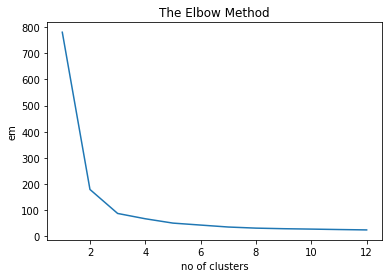

In [19]:
#Plotting the graph
plt.plot(range(1,13), em)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('em')
plt.show()

As per the Elbow Method , optimum cluster is where elbow is made. Thus we can select 3 as the optimal cluster for k.

In [20]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=21)
y_kmeans= kmeansmodel.fit_predict(X)

In [21]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Visulaizing the clusters

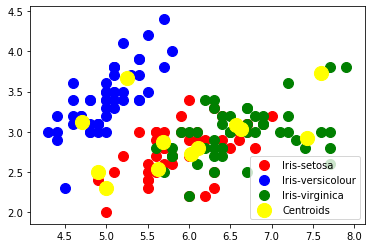

In [22]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()